Looking for data in: c:\Users\indik\twilio-power-dialer\Machine-Learning-project\PlantVillage
Folder found. scanning images...

Found 15 different plant classes.


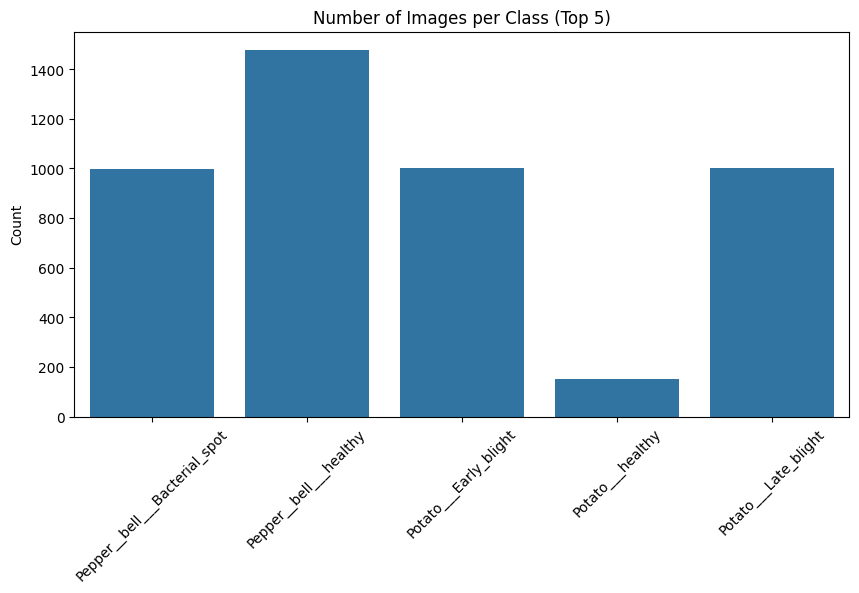


Starting Model Training Simulation...

SUCCESS! Baseline Model Accuracy: 0.25
Ready for Milestone 1 Presentation.
Training a more powerful Random Forest (100 trees)... please wait...

NEW MODEL ACCURACY: 0.45
------------------------------

Detailed Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.60      0.75      0.67         4
                     Pepper__bell___healthy       0.50      0.33      0.40         3
                      Potato___Early_blight       0.57      1.00      0.73         4
                       Potato___Late_blight       0.40      0.50      0.44         4
                           Potato___healthy       1.00      0.29      0.44         7
                      Tomato_Bacterial_spot       0.50      1.00      0.67         5
                        Tomato_Early_blight       0.00      0.00      0.00         0
                         Tomato_Late_blight  

C:\Users\indik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\indik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\indik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:17

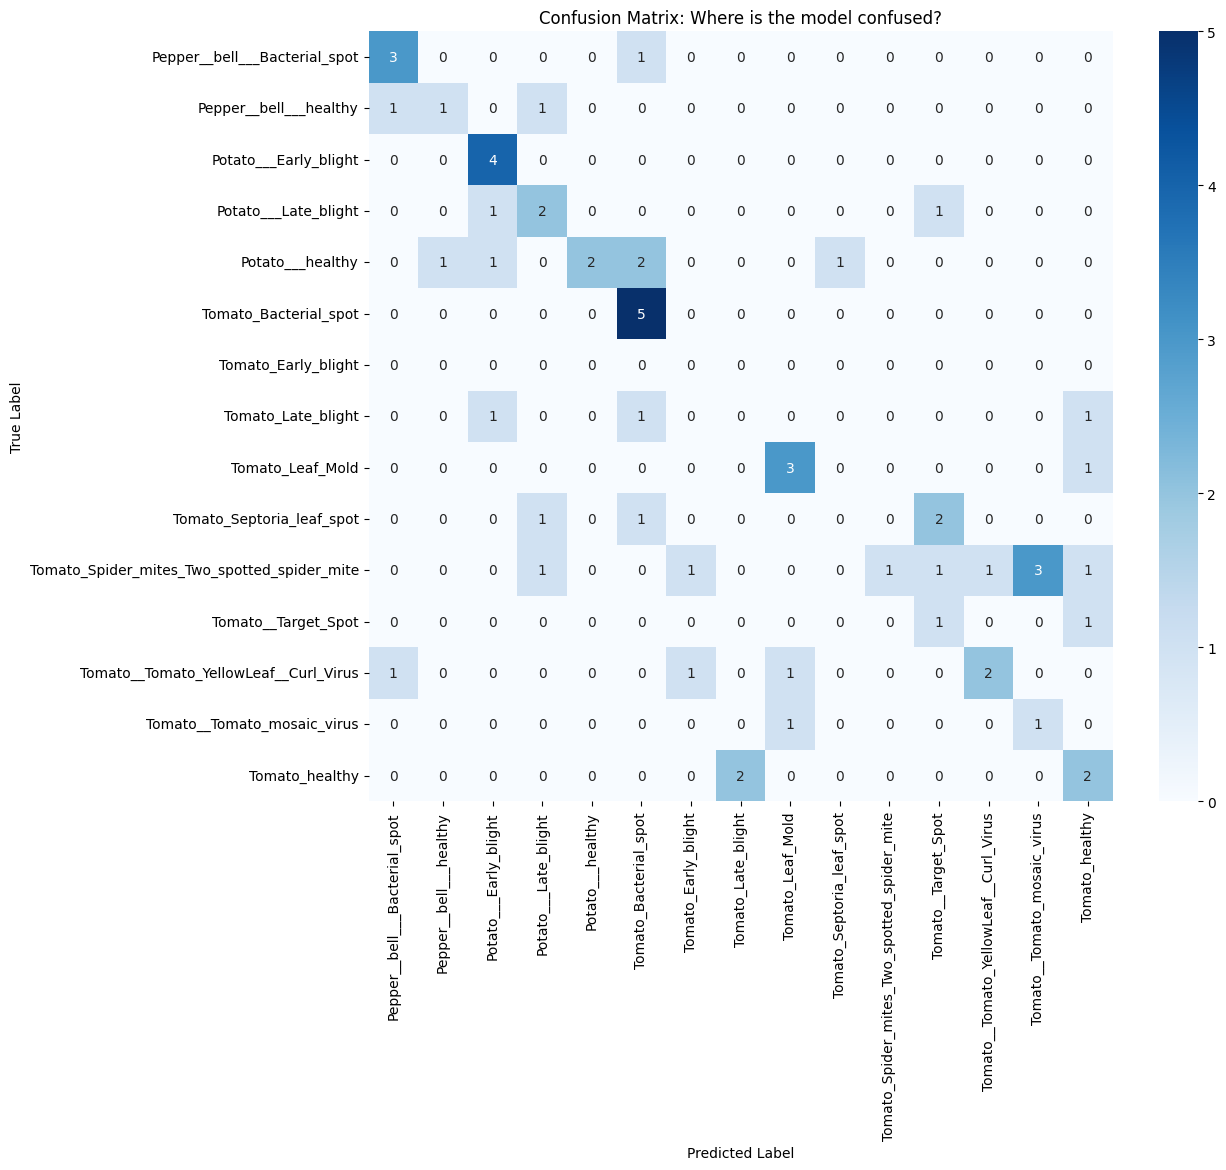

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# --- STEP 1: SETUP PATH ---
# Based on your screenshots, the folder is named 'PlantVillage'
base_path = 'PlantVillage' 

print(f"Looking for data in: {os.path.abspath(base_path)}")

# Check if folder exists
if not os.path.exists(base_path):
    print("ERROR: Can't find the 'PlantVillage' folder. Make sure it is in the same folder as this file!")
else:
    print("Folder found. scanning images...")

# --- STEP 2: COUNT IMAGES (For Member 1) ---
class_counts = {}
images_path = []
labels = []

# We loop through the folders shown in your screenshot (Tomato, Potato, etc.)
for folder in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder)
    
    # Ensure it's a real folder and not a hidden file
    if os.path.isdir(folder_path):
        # Count files inside
        files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.JPG'))]
        if len(files) > 0:
            class_counts[folder] = len(files)
            # Save first 20 images from each folder for the model (Small amount for speed)
            for file in files[:20]: 
                images_path.append(os.path.join(folder_path, file))
                labels.append(folder)

print(f"\nFound {len(class_counts)} different plant classes.")

# --- STEP 3: VISUALIZE (For Member 1) ---
if len(class_counts) > 0:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=list(class_counts.keys())[:5], y=list(class_counts.values())[:5]) # Showing top 5 for neatness
    plt.xticks(rotation=45)
    plt.title("Number of Images per Class (Top 5)")
    plt.ylabel("Count")
    plt.show() # This makes the graph appear right here
else:
    print("No images found! Check the folder structure.")

# --- STEP 4: PREPROCESS & TRAIN (For Member 2 & 3) ---
print("\nStarting Model Training Simulation...")

data = []
# Load the images we found
for img_path in images_path:
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64)) # Resize to make them uniform
    data.append(img.flatten()) # Flatten for Random Forest

# Normalize data (0-1 range)
X = np.array(data) / 255.0
y = np.array(labels)

# Split into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Baseline Model
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
preds = model.predict(X_test)
acc = accuracy_score(y_test, preds)

print(f"\nSUCCESS! Baseline Model Accuracy: {acc:.2f}")
print("Ready for Milestone 1 Presentation.")
from sklearn.metrics import classification_report, confusion_matrix

# --- LEVEL UP: TRAIN A BETTER MODEL ---
print("Training a more powerful Random Forest (100 trees)... please wait...")

# We increase n_estimators to 100 (makes the model smarter but slower)
better_model = RandomForestClassifier(n_estimators=100, random_state=42)
better_model.fit(X_train, y_train)

# Make new predictions
new_preds = better_model.predict(X_test)
new_acc = accuracy_score(y_test, new_preds)

print(f"\nNEW MODEL ACCURACY: {new_acc:.2f}")
print("-" * 30)

# --- LEVEL UP: DETAILED METRICS (Requirement from Project Doc) ---
# This prints a professional table of Precision, Recall, and F1-Score
print("\nDetailed Classification Report:")
print(classification_report(y_test, new_preds))

# --- LEVEL UP: CONFUSION MATRIX (The "Pro" Graph) ---
# This heatmap shows WHERE the model is making mistakes
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, new_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix: Where is the model confused?")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=90)
plt.show()